In [2]:
# résolution de l'EDP de Black-Scholes par différences finies

# librairies
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy
import time


In [3]:
# paramètres financiers
S0 = 247.12
r = 0.035
sigma = 0.2
T = 2.
K = 269.99

In [4]:
# paramètres numériques
N = 10000 # nb de points en prix
M = 1000 # nb de points en temps
Smax = 1000 # prix maximum pour la résolution
dt = T/M
ds = Smax/N
print("Les pas de temps et prix sont:",dt,ds)

Les pas de temps et prix sont: 0.002 0.1


In [5]:
# initialisation de la matrice C (valeurs de l'option)
C = np.zeros((M+1,N+1))
# tableau des prix S
S = ds*np.arange(N+1)
# tableau des temps t
t = dt*np.arange(M+1)
# prix finaux t=T
C[M,:] = np.maximum(S-K,0)
# conditions aux bords en prix
C[:,0] = 0.
C[:,N] = Smax-K*np.exp(-r*(T-t))

In [6]:
C
S

array([0.000e+00, 1.000e-01, 2.000e-01, ..., 9.998e+02, 9.999e+02,
       1.000e+03])

In [7]:
# matrice du système linéaire (qui ne dépend pas du temps)
#A = np.zeros((N-1,N-1))
A = np.diag(-1/dt - (sigma**2/ds**2)*S[1:N]**2 - r*S[1:N]/ds - r) \
   +np.diag(0.5*(sigma/ds)**2*S[1:N-1]**2 + r/ds*S[1:N-1],1) \
   +np.diag(0.5*(sigma/ds)**2*S[2:N]**2,-1)
   
print(A)

[[-5.00110000e+02  5.50000000e-02  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 8.00000000e-02 -5.00265000e+02  1.50000000e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.80000000e-01 -5.00500000e+02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -3.99845029e+06
   1.99915008e+06  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.99920008e+06
  -3.99925013e+06  1.99955001e+06]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   1.99960002e+06 -4.00005004e+06]]


In [8]:
# on lance le chronomètre
start = time.time()
# boucle en temps 
M=2
for i in range(M-1,-1,-1):
    # vecteur du second membre
    b = -1/dt*C[i+1,1:N]
    # ajout des conditions aux bords
    b[0] += -0.5*(sigma/ds)**2*S[1]**2*C[i,0]
    b[N-2] += (-0.5*(sigma/ds)**2*S[N-1]**2 - r/ds*S[N-1])*C[i,N]
    # résolution du système Ax=b
    C[i,1:N] = np.linalg.solve(A,b)
end = time.time()
print(end-start)

9.96058177947998


In [10]:
# valeur de l'option à l'instant 0 (à la signature) pour différents prix d'actif
C[0,:]

array([  0.        ,   0.        ,   0.        , ..., 736.48672374,
       742.37463682, 748.26299256])

In [11]:
# valeur exacte de la solution
C0exact = S*norm.cdf((np.log(S/K)+(r+0.5*sigma**2)*T)/(sigma*np.sqrt(T))) \
          -K*np.exp(-r*T)*norm.cdf((np.log(S/K)+(r-0.5*sigma**2)*T)/(sigma*np.sqrt(T)))

/var/folders/pp/zbmy8_b11y75wbkpn2p486qr0000gn/T/ipykernel_4842/513708623.py:2: RuntimeWarning: divide by zero encountered in log
  C0exact = S*norm.cdf((np.log(S/K)+(r+0.5*sigma**2)*T)/(sigma*np.sqrt(T))) \
/var/folders/pp/zbmy8_b11y75wbkpn2p486qr0000gn/T/ipykernel_4842/513708623.py:3: RuntimeWarning: divide by zero encountered in log
  -K*np.exp(-r*T)*norm.cdf((np.log(S/K)+(r-0.5*sigma**2)*T)/(sigma*np.sqrt(T)))


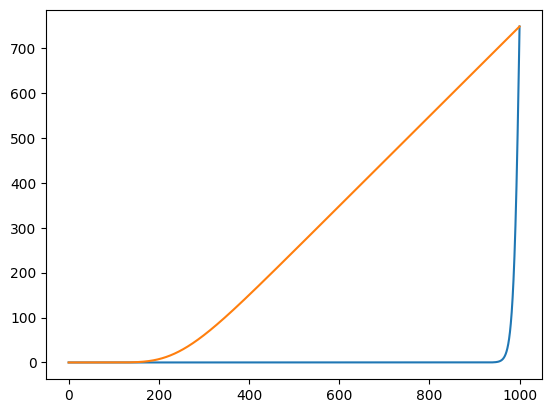

In [12]:
plt.plot(S,C[0,:])
plt.plot(S,C0exact)

In [ ]:
max(abs(C[0,:]-C0exact))

In [ ]:
C0exact

In [ ]:
# changement de schéma => explicite en temps

# initialisation de la matrice C2 (valeurs de l'option)
C2 = np.zeros((M+1,N+1))
# tableau des prix S
S = ds*np.arange(N+1)
# tableau des temps t
t = dt*np.arange(M+1)
# prix finaux t=T
C2[M,:] = np.maximum(S-K,0)
# conditions aux bords en prix
C2[:,0] = 0.
C2[:,N] = Smax-K*np.exp(-r*(T-t))

In [ ]:
# on lance le chronomètre
start = time.time()
# boucle en temps 
for i in range(M-1,-1,-1):
    # boucle en prix
    for j in range(1,N):
        C2[i,j] = C2[i+1,j]+dt*(0.5*sigma**2*S[j]**2*(C2[i+1,j+1]-2*C2[i+1,j]+C2[i+1,j-1])/ds**2 \
                   +r*S[j]*(C2[i+1,j+1]-C2[i+1,j])/ds-r*C2[i+1,j])
end = time.time()
print(end-start)

In [ ]:
plt.plot(S,C2[0,:])
plt.plot(S,C0exact)

In [ ]:
max(abs(C2[0,:]-C0exact))

In [ ]:
C2

In [ ]:
# étude de stabilité de la matrice du schéma explicite
A2 = np.diag(1 - dt*(sigma**2/ds**2)*S[1:N]**2 - dt*r*S[1:N]/ds - dt*r) \
   +np.diag(dt*0.5*(sigma/ds)**2*S[1:N-1]**2 + dt*r/ds*S[1:N-1],1) \
   +np.diag(dt*0.5*(sigma/ds)**2*S[2:N]**2,-1)

In [ ]:
np.linalg.eig(A2)

In [ ]:
0.9**100

In [ ]:
np.linalg.eig(-dt*A)

In [ ]:
1/(sigma**2*Smax**2)

In [ ]:
# on joue avec la méthode implicite
start = time.time()
# boucle en temps 
M=2
for i in range(M-1,-1,-1):
    # vecteur du second membre
    b = -1/dt*C[i+1,1:N]
    # ajout des conditions aux bords
    b[0] += -0.5*(sigma/ds)**2*S[1]**2*C[i,0]
    b[N-2] += (-0.5*(sigma/ds)**2*S[N-1]**2 - r/ds*S[N-1])*C[i,N]
    # résolution du système Ax=b
    C[i,1:N] = np.linalg.solve(A,b)
end = time.time()
print(end-start)

In [ ]:
start = time.time()
# boucle en temps 
M=2
for i in range(M-1,-1,-1):
    # vecteur du second membre
    b = -1/dt*C[i+1,1:N]
    # ajout des conditions aux bords
    b[0] += -0.5*(sigma/ds)**2*S[1]**2*C[i,0]
    b[N-2] += (-0.5*(sigma/ds)**2*S[N-1]**2 - r/ds*S[N-1])*C[i,N]
    # résolution du système Ax=b
    C[i,1:N] = scipy.linalg.solve(A,b)
end = time.time()
print(end-start)

In [ ]:
L,U = scipy.linalg.lu(A,permute_l=T)